In [1]:
from pycaret.datasets import get_data
data = get_data('kiva')

country                                                 en  \
0  Dominican Republic  "Banco Esperanza" is a group of 10 women looki...   
1  Dominican Republic  "Caminemos Hacia Adelante" or "Walking Forward...   
2  Dominican Republic  "Creciendo Por La Union" is a group of 10 peop...   
3  Dominican Republic  "Cristo Vive" ("Christ lives" is a group of 10...   
4  Dominican Republic  "Cristo Vive" is a large group of 35 people, 2...   

  gender  loan_amount nonpayment    sector  status  
0      F         1225    partner    Retail       0  
1      F         1975     lender  Clothing       0  
2      F         2175    partner  Clothing       0  
3      F         1425    partner  Clothing       0  
4      F         4025    partner      Food       0

In [2]:
data.shape

(6818, 7)

In [3]:
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

In [4]:
from pycaret.nlp import *
exp_nlp101 = setup(data=data, target='en', session_id=123)

In [5]:
lda = create_model('lda')

In [6]:
print(lda)

LdaModel(num_terms=4654, num_topics=4, decay=0.5, chunksize=100)


In [7]:
lda2 = create_model('lda', num_topics=6, multi_core=True)

In [8]:
print(lda2)

LdaModel(num_terms=4654, num_topics=6, decay=0.5, chunksize=100)


In [9]:
lda_results = assign_model(lda)
lda_results.head()

country                                                 en  \
0               Kenya  praxide marry child primary school train tailo...   
1               Kenya  run year old life wife child biological adopt ...   
2  Dominican Republic  live child boy girl range year old sell use cl...   
3               Kenya  phanice marry child daughter secondary school ...   
4               Kenya  fredrice year old hotel operate hotel last yea...   

  gender  loan_amount nonpayment    sector  status   Topic_0   Topic_1  \
0      F           75    partner  Services       0  0.824200  0.172317   
1      M         1200    partner    Health       0  0.664231  0.332275   
2      F          150    partner  Clothing       0  0.125461  0.792853   
3      F          150     lender  Services       1  0.635879  0.359823   
4      F          300     lender      Food       1  0.608233  0.388068   

    Topic_2   Topic_3 Dominant_Topic  Perc_Dominant_Topic  
0  0.003055  0.000429        Topic 0                 0.82  
1  0.003065  0.000429        Topic 0                 0.66  
2  0.081170  0.000517        Topic 1                 0.79  
3  0.003771  0.000528        Topic 0                 0.64  
4  0.003244  0.000455        Topic 0                 0.61

In [10]:
plot_model()

In [11]:
plot_model(plot='bigram')

In [12]:
plot_model(lda, plot='frequency', topic_num='Topic 1')

In [13]:
plot_model(lda, plot='topic_distribution')

In [14]:
plot_model(lda, plot='tsne')

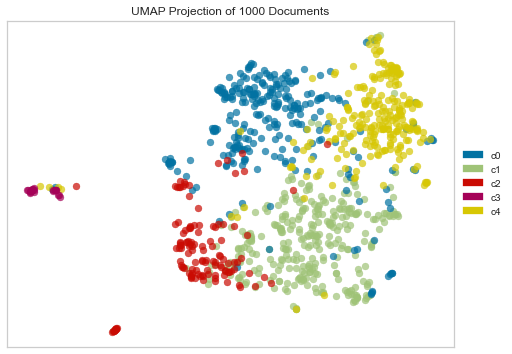

In [15]:
plot_model(lda, plot='umap')

In [16]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [17]:
save_model(lda, 'final_models/Final NLP LDA Model 28Nov2020')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x20683ba0608>,
 'final_models/Final NLP LDA Model 28Nov2020.pkl')